In [ ]:
import pandas as pd
import numpy as np
import pickle
import math
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
wiki_vote = open("/content/drive/MyDrive/IR/Assignment3/Wiki-Vote.txt",'rb')

In [ ]:
wiki_edges = []
wiki_nodes = set()
count = 1
for line in wiki_vote:
  if count>4:
    l = line.decode("UTF-8").split()
    id1 = int(l[0])
    id2 = int(l[1])
    wiki_nodes.add(id1)
    wiki_nodes.add(id2)
    edge = []
    edge.append(id1)
    edge.append(id2)
    wiki_edges.append(edge)
  count += 1

In [ ]:
# Array Representation of Graph
wiki_matrix = np.array([[0]*8298]*8298)

In [ ]:
for edge in wiki_edges:
  wiki_matrix[edge[0]][edge[1]] = 1

**Matrix Representation of graph**

In [ ]:
pd.DataFrame(wiki_matrix)

,0,1,2,3,4,5,6,7,8,9,...,8288,8289,8290,8291,8292,8293,8294,8295,8296,8297
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#pickle.dump(wiki_edges,open("/content/drive/MyDrive/IR/Assignment3/wiki_edges",'wb'))

In [ ]:
# Edge list
edgelist = {}
for i in range(len(wiki_edges)):
  edge = wiki_edges[i]
  
  if edge[0] in edgelist.keys():
    edgelist[edge[0]].append(edge[1])
  else:
    edgelist[edge[0]] = []
    edgelist[edge[0]].append(edge[1])

In [ ]:
print(edgelist)

{30: [1412, 3352, 5254, 5543, 7478], 3: [28, 30, 39, 54, 108, 152, 178, 182, 214, 271, 286, 300, 348, 349, 371, 567, 581, 584, 586, 590, 604, 611, 8283], 25: [3, 6, 8, 19, 23, 28, 29, 30, 33, 35, 50, 54, 55, 75, 80, 86, 94, 127, 152, 154, 182, 192, 214, 224, 226, 246, 252, 255, 257, 261, 271, 273, 280, 282, 286, 299, 300, 302, 306, 308, 310, 322, 325, 339, 348, 349, 356, 358, 363, 370, 371, 373, 377, 379, 407, 415, 422, 428, 439, 488, 514, 545, 549, 560, 590, 592, 600, 604, 611, 645, 650, 659, 664, 667, 673, 675, 696, 706, 723, 739, 756, 857, 864, 893, 959, 994, 1131, 3755, 8282, 8284], 4: [8, 10, 28, 30, 38, 55, 56, 75, 130, 140, 147, 151, 152, 214, 232, 243, 282, 299, 341, 363, 370, 415, 560, 606, 611, 645, 650, 659, 8282], 5: [6, 8, 10, 23, 30, 33, 38, 50, 54, 55, 61, 75, 89, 93, 127, 130, 147, 153, 163, 167, 168, 175, 299], 6: [3, 8, 10, 19, 23, 28, 29, 30, 33, 34, 35, 38, 39, 50, 54, 55, 56, 61, 80, 86, 89, 93, 94, 127, 130, 132, 135, 140, 147, 151, 153, 154, 163, 167, 168, 171, 1

In [ ]:
#pickle.dump(edgelist,open("/content/drive/MyDrive/IR/Assignment3/edgelist",'wb'))

1. Number of Nodes

In [ ]:
print("Number of Nodes ",len(wiki_nodes))

Number of Nodes  7115


2. Number of Edges

In [ ]:
print("Number of Edges ",len(wiki_edges))

Number of Edges  103689


In [ ]:
# IN and OUT Degree of a Node
in_out_degree = {}
for node in wiki_nodes:
  in_out_degree[node] = [0]*2

for i in edgelist:
  connected_nodes = edgelist[i]
  in_out_degree[i][1] = len(connected_nodes)
  
  for p in connected_nodes:
    in_out_degree[p][0]+=1

In [ ]:
#pickle.dump(in_out_degree,open("/content/drive/MyDrive/IR/Assignment3/in_out_degree",'wb'))

3,4. Average IN and OUT degree

In [ ]:
# Average IN and OUT degree
indegree = 0
outdegree = 0

for i in in_out_degree.values():
  indegree += i[0]
  outdegree += i[1]

print("Average IN Degree ",indegree/len(wiki_nodes))
print("Average OUT Degree ",outdegree/len(wiki_nodes))

Average IN Degree  14.573295853829936
Average OUT Degree  14.573295853829936


5,6. Node with maximum IN Degree and Node with maximum OUT Degree

In [ ]:
maxIndegree = 0
maxIndegreeNode = 0
maxOutdegree = 0
maxOutdegreeNode = 0

for i in in_out_degree:
  if maxIndegree < in_out_degree[i][0]:
    maxIndegree = in_out_degree[i][0]
    maxIndegreeNode = i

  if maxOutdegree < in_out_degree[i][1]:
    maxOutdegree = in_out_degree[i][1]
    maxOutdegreeNode = i

print("Maximum IN degree node:  ", maxIndegreeNode, " Maximum IN degree:  ",maxIndegree)
print("Maximum OUT degree node: ",maxOutdegreeNode, " Maximum OUT degree: ",maxOutdegree)

Maximum IN degree node:   4037  Maximum IN degree:   457
Maximum OUT degree node:  2565  Maximum OUT degree:  893


7. Density of a graph = (Number of Edges)/(Number of Possible Edges) = = |E|/(|V|(|V|-1))

In [ ]:
# Density of a graph = (Number of Edges)/(Number of Possible Edges) = |E|/(|V|(|V|-1))
density = len(wiki_edges)/(len(wiki_nodes)*(len(wiki_nodes)-1))
print("Density of Network: ",density)

Density of Network:  0.0020485375110809584


**Degree Distribution Plots**

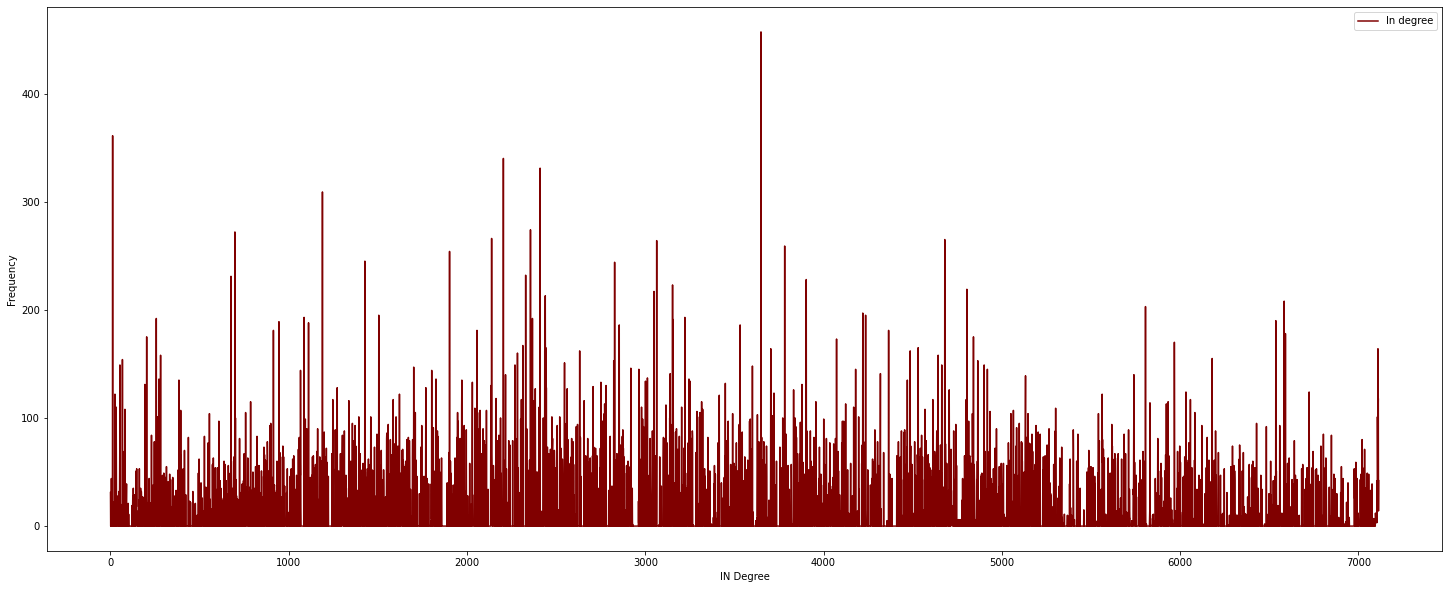

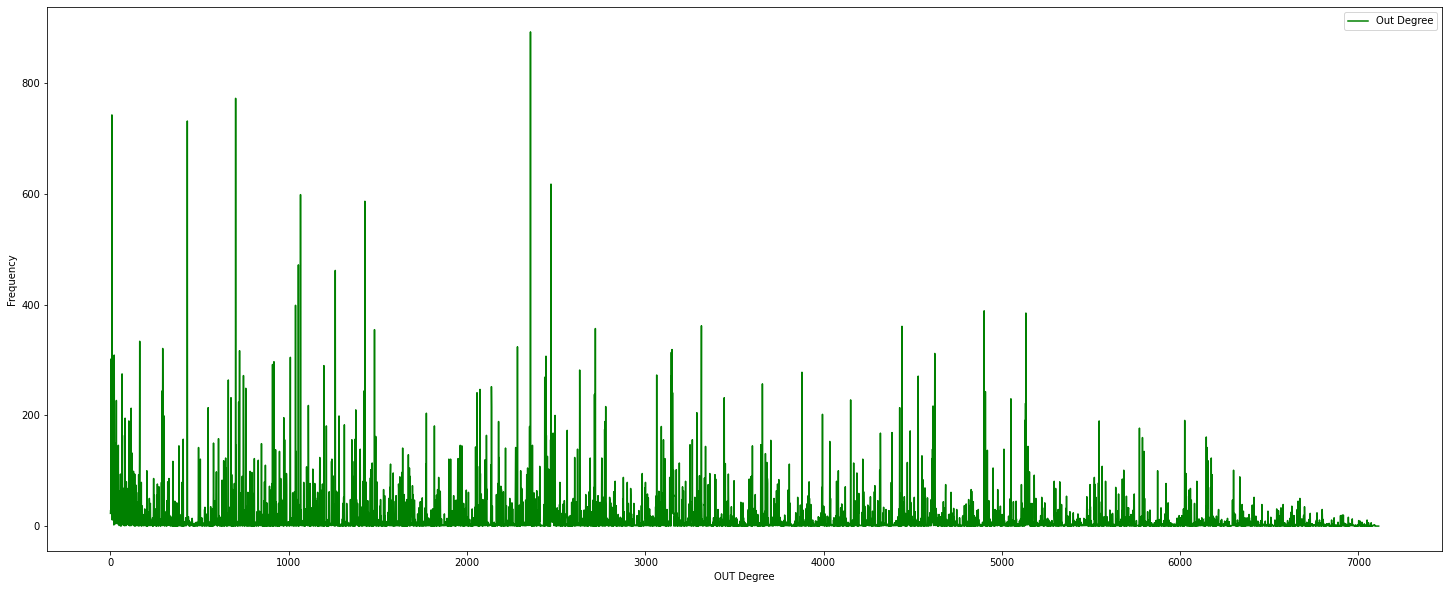

In [ ]:
indegree = []
outdegree = []
for i in in_out_degree:
  indegree.append(in_out_degree[i][0])
  outdegree.append(in_out_degree[i][1])

plt.figure(figsize=(25,10))
plt.plot(range(len(indegree)),indegree,color='maroon', label="IN Degree")
plt.xlabel("IN Degree")
plt.ylabel("Frequency")
plt.legend(["In degree"])
plt.show()

plt.figure(figsize=(25,10))
plt.plot(range(len(outdegree)),outdegree, color='green', label = "OUT Degree")
plt.xlabel("OUT Degree")
plt.ylabel("Frequency")
plt.legend(["Out Degree"])
plt.show()

**Local Clustering Coefficient Calculation**

**clustering coefficient for directed graph = Li/(di(di-1))**

"di" is the number of neighbours of a vertex

"Li" is the number of edges between the "ki" neighbors of node i**

In [ ]:
local_clusturing_coeff = []

for i in edgelist:
  connected_nodes = edgelist[i]
  outdegree = len(connected_nodes)
  coefficient = 0
  for j in connected_nodes:
    for k in connected_nodes:
      if k in edgelist.keys():
        if j!=k and j in edgelist[k]:
          coefficient+=1
  if outdegree == 0 or outdegree == 1:
    local_clusturing_coeff.append(0)
  else:
    local_clusturing_coeff.append((coefficient)/(outdegree*(outdegree-1)))

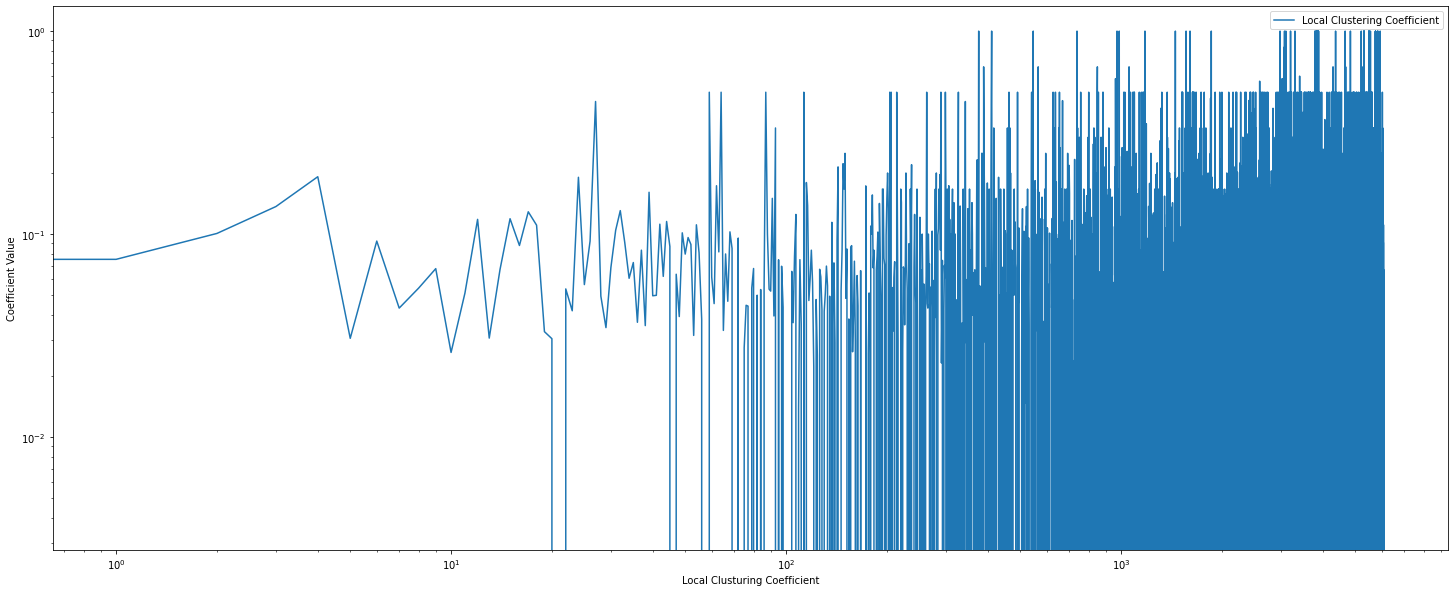

In [ ]:
plt.figure(figsize=(25, 10)) 
plt.loglog(range(len(local_clusturing_coeff)), local_clusturing_coeff, label='Local Clusturing Coefficient') 
plt.xlabel('Local Clusturing Coefficient')
plt.ylabel('Coefficient Value')
plt.legend(["Local Clustering Coefficient"])
plt.show()